# Netflix TV Shows and Movies

This data set was created to list all shows available on Netflix streaming, and analyze the data to find interesting facts. This data was acquired in May 2022 containing data available in the United States.

### Content
This dataset has two files containing the titles (titles.csv) and the cast (credits.csv) for the title.

This dataset contains +5k unique titles on Netflix with 15 columns containing their information, including:

- ID: The title ID on JustWatch.
- title: The name of the title.
- show type: TV show or movie.
- description: A brief description.
- release year: The release year.
- age certification: The age certification.
- runtime: The length of the episode (SHOW) or movie.
- genres: A list of genres.
- production countries: A list of countries that produced the title.
- seasons: Number of seasons if it's a SHOW.
- IMDB ID: The title ID on IMDB.
- IMDB Score: Score on IMDB.
- IMDB Votes: Votes on IMDB.
- TMDB Popularity: Popularity on TMDB.
- TMDB Score: Score on TMDB.

And over +77k credits of actors and directors on Netflix titles with 5 columns containing their information, including:

- person ID: The person ID on JustWatch.
- ID: The title ID on JustWatch.
- name: The actor or director's name.
- character name: The character name.
- role: ACTOR or DIRECTOR.

### Tasks

Developing a content-based recommender system using the genres and/or descriptions.
Identifying the main content available on the streaming.
Network analysis on the cast of the titles.
Exploratory data analysis to find interesting insights.

## titles.csv

### import dependencies

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
import random
import ast

plt.style.use("seaborn")

In [4]:
df = pd.read_csv("titles.csv")
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

In [11]:
isna_result = df.isna().sum().to_dict()
isna_result

{'id': 0,
 'title': 1,
 'type': 0,
 'description': 18,
 'release_year': 0,
 'age_certification': 2610,
 'runtime': 0,
 'genres': 0,
 'production_countries': 0,
 'seasons': 3759,
 'imdb_id': 444,
 'imdb_score': 523,
 'imdb_votes': 539,
 'tmdb_popularity': 94,
 'tmdb_score': 318}

In [12]:
print("Total num of anamolies (missing values) found : ", sum([val for val in isna_result.values()]))

Total num of anamolies (missing values) found :  8306


In [9]:
categorical_cols = {
    'type' : 0,
    'release_year' : 0,
    'age_certification' : 0
}

for col_ in categorical_cols.keys():
    categorical_cols[col_] += len(df[col_].value_counts().to_dict().keys())
    
print(categorical_cols)

{'type': 2, 'release_year': 67, 'age_certification': 11}


In [13]:
df.sort_values(['release_year', 'imdb_score'], ascending=False)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
5059,ts296563,Who Rules The World,SHOW,A legendary wuxia romance that focuses on the ...,2022,TV-PG,44,"['drama', 'fantasy', 'romance']",['CN'],1.0,tt14950036,9.2,81.0,57.401,8.7
4832,ts217231,Heartstopper,SHOW,Teens Charlie and Nick discover their unlikely...,2022,TV-14,28,"['drama', 'romance']",['GB'],1.0,tt10638036,8.9,28978.0,926.362,8.9
4965,ts302363,Twenty Five Twenty One,SHOW,The dreams of two young people are crushed by ...,2022,TV-14,76,"['drama', 'romance']",['KR'],1.0,tt17513352,8.7,4081.0,76.371,8.6
4938,ts321513,My Liberation Notes,SHOW,"Three siblings, exhausted by the monotony of d...",2022,TV-14,62,"['drama', 'romance']",['KR'],1.0,tt15146130,8.4,276.0,62.434,8.0
5573,ts310628,MaveriX,SHOW,Six young motocross riders come together to fo...,2022,NaN,23,"['sport', 'family']",['AU'],1.0,tt15373864,8.4,31.0,2.880,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,tm204541,Dark Waters,MOVIE,"Ragab, a poor sailor, returns home to Alexandr...",1956,NaN,120,"['drama', 'action', 'romance', 'thriller']",['EG'],NaN,tt0049761,6.7,590.0,1.044,5.9
15,tm16479,White Christmas,MOVIE,Two talented song-and-dance men team up after ...,1954,NaN,115,"['romance', 'comedy', 'music']",['US'],NaN,tt0047673,7.5,42373.0,9.710,7.2
28,tm19608,The Blazing Sun,MOVIE,A rich landlord floods and destroys a village ...,1954,NaN,100,"['romance', 'crime', 'drama']",['EG'],NaN,tt0044429,7.4,1219.0,1.866,7.0
24,tm102287,Raya and Sakina,MOVIE,Dramatic rendition of a real life crime wave t...,1953,NaN,105,"['drama', 'thriller', 'crime', 'history']",['EG'],NaN,tt0316472,6.8,231.0,1.826,5.8


<AxesSubplot:>

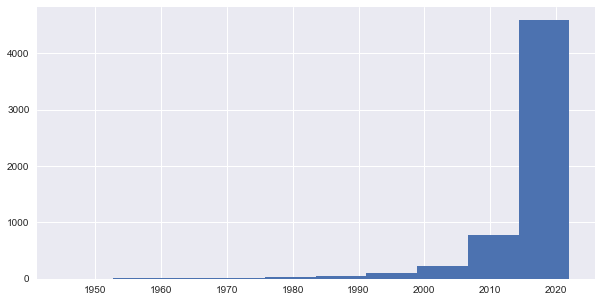

In [15]:
df["release_year"].hist(figsize=(10, 5))

<AxesSubplot:>

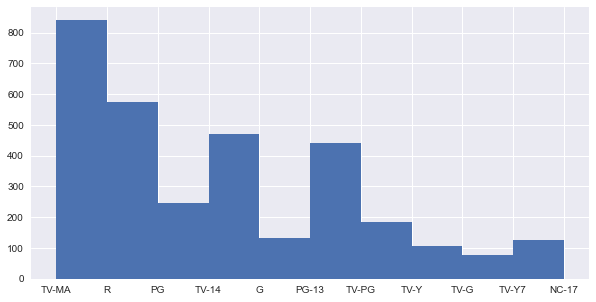

In [16]:
df['age_certification'].hist(figsize=(10,5))

In [17]:
grouped_df = df.groupby(["release_year"]).mean()
grouped_df

,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
release_year,,,,,,
1945,48.000000,1.000000,NaN,NaN,0.600000,NaN
1953,105.000000,NaN,6.800000,231.000000,1.826000,5.800000
1954,107.500000,NaN,7.450000,21796.000000,5.788000,7.100000
1956,120.000000,NaN,6.700000,590.000000,1.044000,5.900000
1958,77.000000,NaN,7.500000,4385.000000,3.556000,7.400000
...,...,...,...,...,...,...
2018,73.918605,1.850498,6.530559,9339.311050,13.924341,6.752285
2019,74.737028,1.590909,6.526168,11701.365952,12.150977,6.955791
2020,71.915528,1.336601,6.344444,9950.611621,14.800493,6.977056


## cleansing data

- Unpack and repair the production_countries and genre column values which are currently arrays
- Apply reasonable strategies to drop columns and/or rows with missing data
- Correct column data types where needed

In [18]:
def repair_array_bound_categories(arr):
    arr = ast.literal_eval(arr)
    
    if len(arr) == 0:
        return np.nan
    elif len(arr) == 1:
        return arr[0]
    else:
        return random.choice(arr)

In [19]:
df["production_countries"] = df["production_countries"].apply(repair_array_bound_categories)
df["genres"] = df["genres"].apply(repair_array_bound_categories)
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,documentation,US,1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,drama,US,NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,comedy,GB,NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,comedy,GB,NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,horror,US,NaN,tt0070047,8.1,391942.0,95.337,7.7


In [20]:
cols_to_fill = ("imdb_score", "tmdb_score", "tmdb_popularity")

for col_ in cols_to_fill:
    df[col_].fillna(0.0, inplace=True)

In [21]:
df.dropna(axis=0, subset=[
    "imdb_votes",
    "imdb_id",
    "age_certification",
    "production_countries",
    "genres",
    "seasons",
    "description"
], inplace=True)

In [22]:
df["seasons"] = df["seasons"].apply(int)
df["imdb_votes"] = df["imdb_votes"].apply(int)

df.isna().sum()

id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1620 entries, 5 to 5796
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1620 non-null   object 
 1   title                 1620 non-null   object 
 2   type                  1620 non-null   object 
 3   description           1620 non-null   object 
 4   release_year          1620 non-null   int64  
 5   age_certification     1620 non-null   object 
 6   runtime               1620 non-null   int64  
 7   genres                1620 non-null   object 
 8   production_countries  1620 non-null   object 
 9   seasons               1620 non-null   int64  
 10  imdb_id               1620 non-null   object 
 11  imdb_score            1620 non-null   float64
 12  imdb_votes            1620 non-null   int64  
 13  tmdb_popularity       1620 non-null   float64
 14  tmdb_score            1620 non-null   float64
dtypes: float64(3), int64(

In [24]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,comedy,GB,4,tt0063929,8.8,72895,12.919,8.3
47,ts20681,Seinfeld,SHOW,A stand-up comedian and his three offbeat frie...,1989,TV-PG,24,comedy,US,9,tt0098904,8.9,302700,128.743,8.3
55,ts22082,Knight Rider,SHOW,"Michael Long, an undercover police officer, is...",1982,TV-PG,51,action,US,4,tt0083437,6.9,33760,44.378,7.5
57,ts21715,Thomas & Friends,SHOW,Thomas & Friends is a British children's telev...,1984,TV-Y,10,fantasy,GB,24,tt0086815,6.5,4948,49.384,6.6
60,ts20678,Saved by the Bell,SHOW,Lovable schemer Zack Morris leads his pals on ...,1989,TV-G,23,comedy,US,5,tt0096694,7.1,34854,16.945,8.0


## performing analysis on cleasead data

<AxesSubplot:xlabel='runtime', ylabel='Density'>

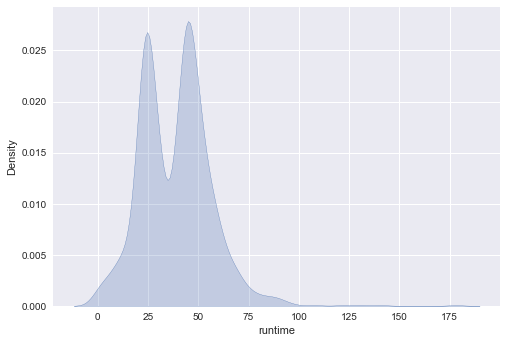

In [26]:
ax = sns.kdeplot(data=df["runtime"], shade=True)
ax

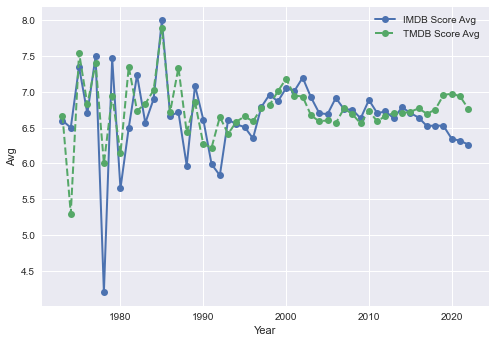

In [28]:
plt.plot(grouped_df.index[17:], grouped_df['imdb_score'][17:], 
         label="IMDB Score Avg", linewidth=2, marker='o', markersize=7)
plt.plot(grouped_df.index[17:], grouped_df['tmdb_score'][17:],
         label="TMDB Score Avg", linewidth=2, marker='o', markersize=7, linestyle='--')

plt.xlabel('Year')
plt.ylabel('Avg')
plt.legend()
plt.show()

c:\Users\piai\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='imdb_score', ylabel='tmdb_score'>

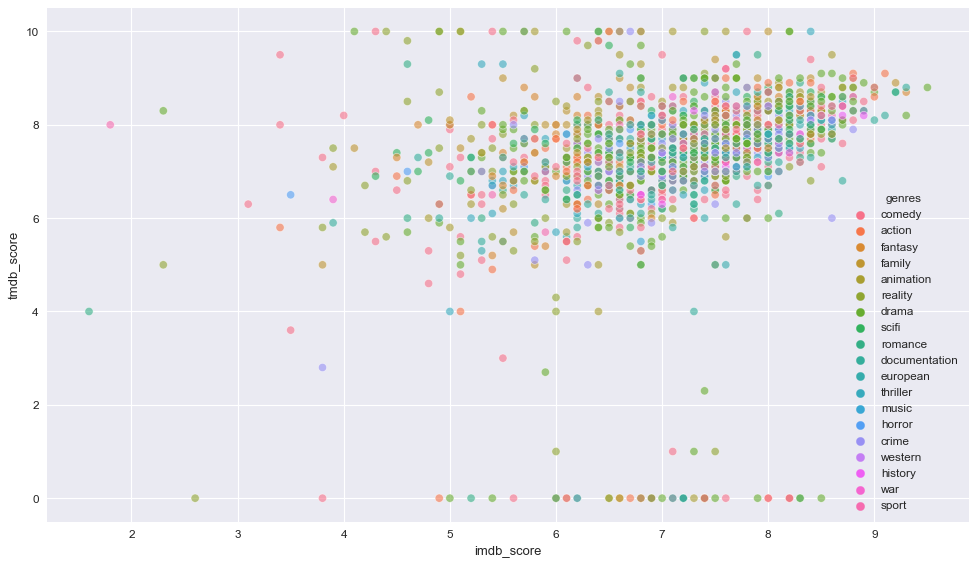

In [29]:
plt.figure(figsize=(14, 8), dpi=85)
sns.scatterplot("imdb_score", "tmdb_score", data=df, hue="genres", palette="husl", alpha=0.6)

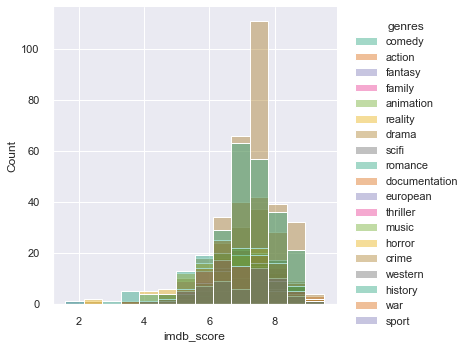

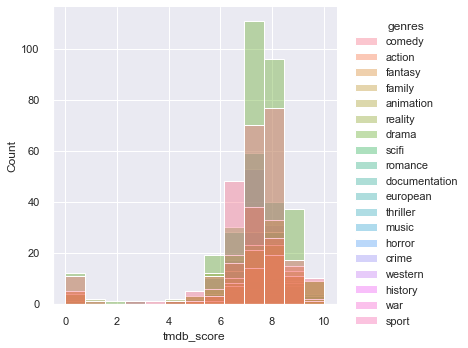

In [30]:
sns.set(style="darkgrid")
sns.displot(data=df, x="imdb_score", bins=14, hue="genres", alpha=0.4, palette="Dark2")
sns.displot(data=df, x="tmdb_score", bins=13, hue="genres", alpha=0.4)

<AxesSubplot:xlabel='production_countries', ylabel='count'>

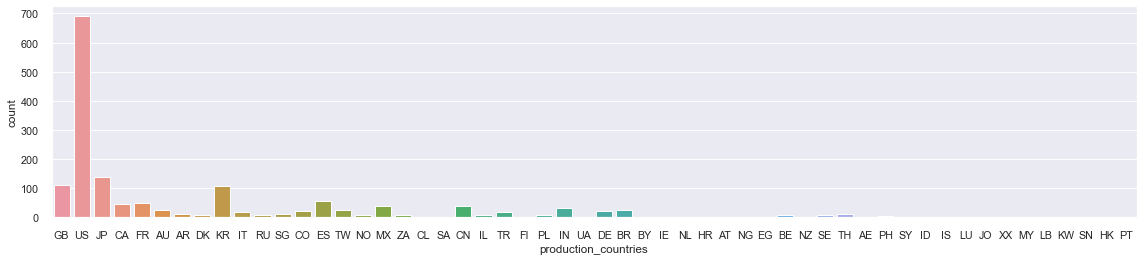

In [31]:
plt.figure(figsize=(20, 4), dpi=70)
sns.countplot(data=df, x="production_countries")

<AxesSubplot:xlabel='age_certification', ylabel='count'>

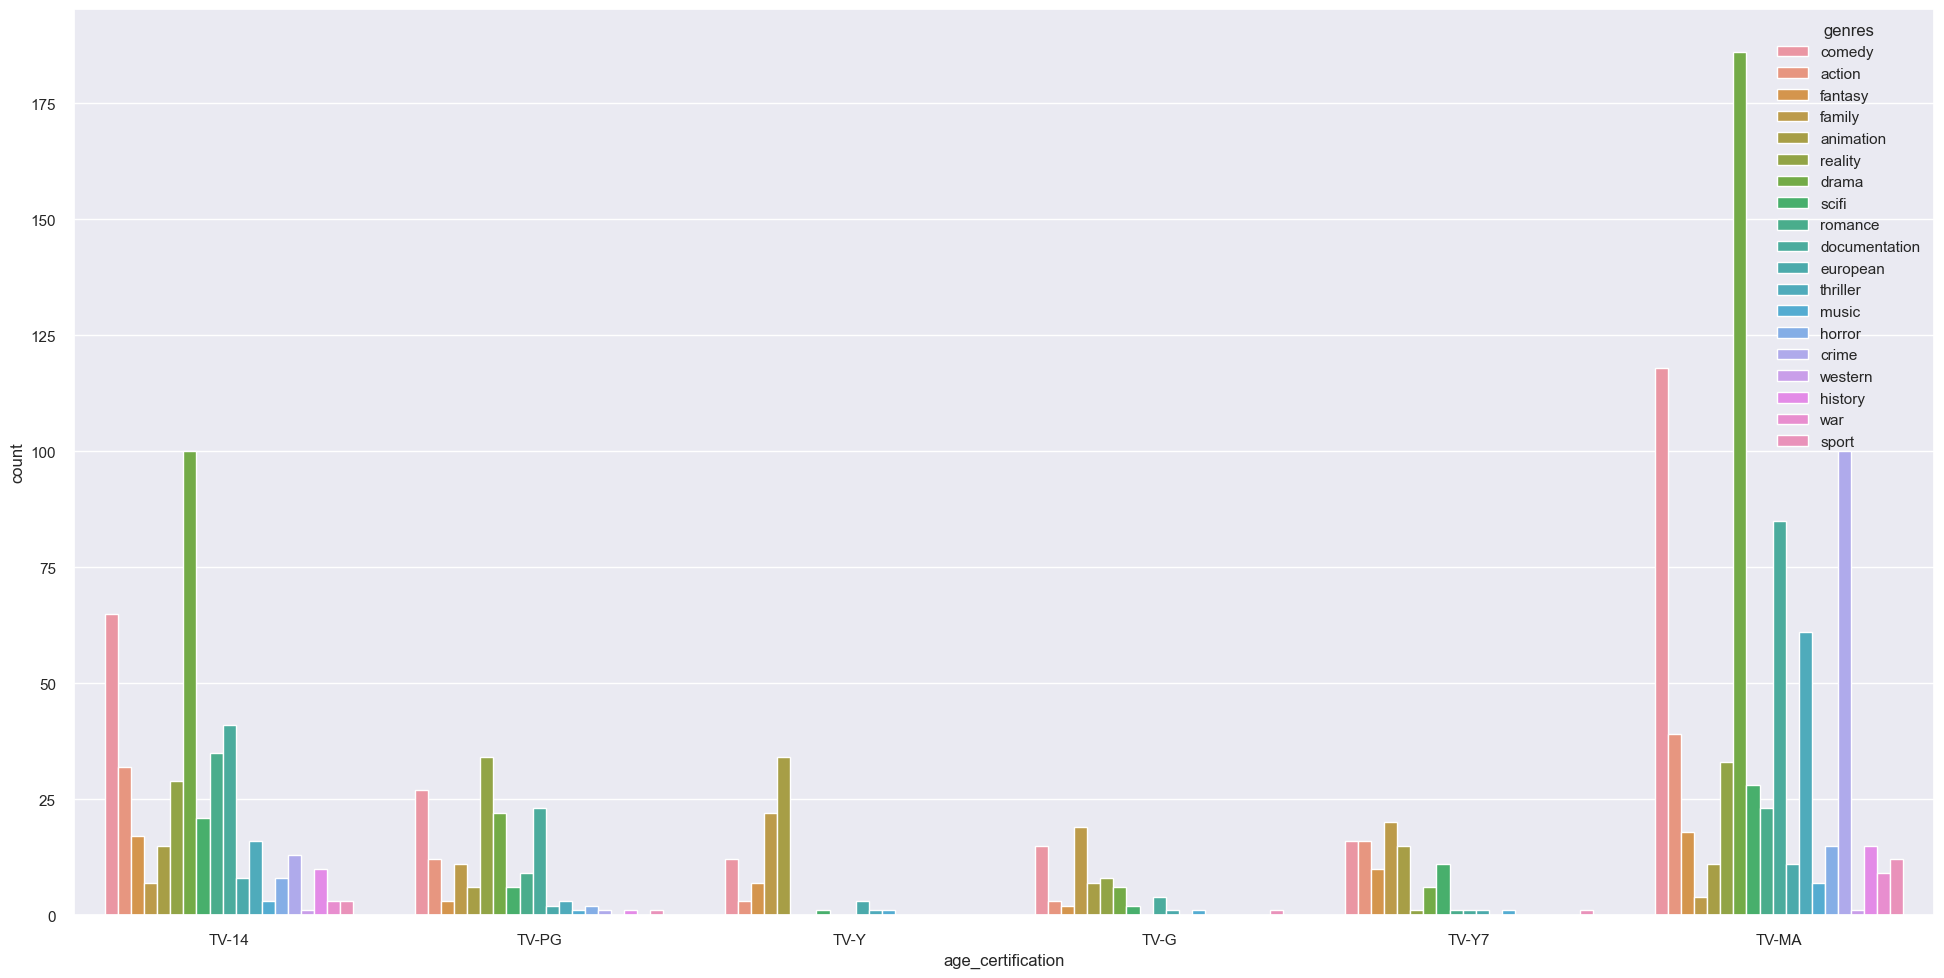

In [32]:
plt.figure(figsize=(24,12), dpi=100)
sns.countplot(data=df, x="age_certification", hue="genres")

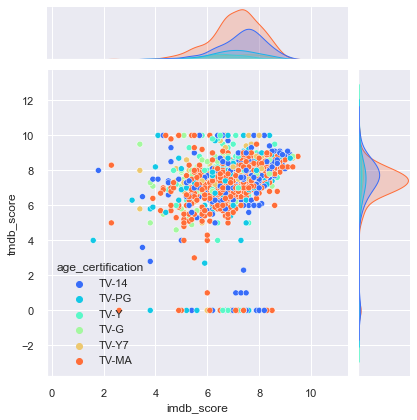

In [33]:
sns.jointplot(x="imdb_score", y="tmdb_score", data=df, hue="age_certification", palette="rainbow", kind="scatter")

## credits.csv

In [39]:
df1 = pd.read_csv("titles.csv")
df1.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [34]:
df2 = pd.read_csv("credits.csv")
df2.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77213 entries, 0 to 77212
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77213 non-null  int64 
 1   id         77213 non-null  object
 2   name       77213 non-null  object
 3   character  67586 non-null  object
 4   role       77213 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.9+ MB


In [40]:
merged = pd.merge(df1, df2)
merged.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,3748,Robert De Niro,Travis Bickle,ACTOR
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,14658,Jodie Foster,Iris Steensma,ACTOR
2,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,7064,Albert Brooks,Tom,ACTOR
3,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,3739,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,48933,Cybill Shepherd,Betsy,ACTOR


In [41]:
merged.shape

(77213, 19)

In [42]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77213 entries, 0 to 77212
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    77213 non-null  object 
 1   title                 77212 non-null  object 
 2   type                  77213 non-null  object 
 3   description           77160 non-null  object 
 4   release_year          77213 non-null  int64  
 5   age_certification     46595 non-null  object 
 6   runtime               77213 non-null  int64  
 7   genres                77213 non-null  object 
 8   production_countries  77213 non-null  object 
 9   seasons               13976 non-null  float64
 10  imdb_id               73388 non-null  object 
 11  imdb_score            72937 non-null  float64
 12  imdb_votes            72850 non-null  float64
 13  tmdb_popularity       77202 non-null  float64
 14  tmdb_score            76093 non-null  float64
 15  person_id          